<a href="https://colab.research.google.com/github/varshith-017/Regression_project/blob/main/Breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
Breast_cancer = load_breast_cancer()

# Create a DataFrame for the dataset
Breast_cancer_df = pd.DataFrame(np.c_[Breast_cancer['data'], Breast_cancer['target']], columns = np.append(Breast_cancer['feature_names'], ['target']))

# Display the first few rows of the dataset
Breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


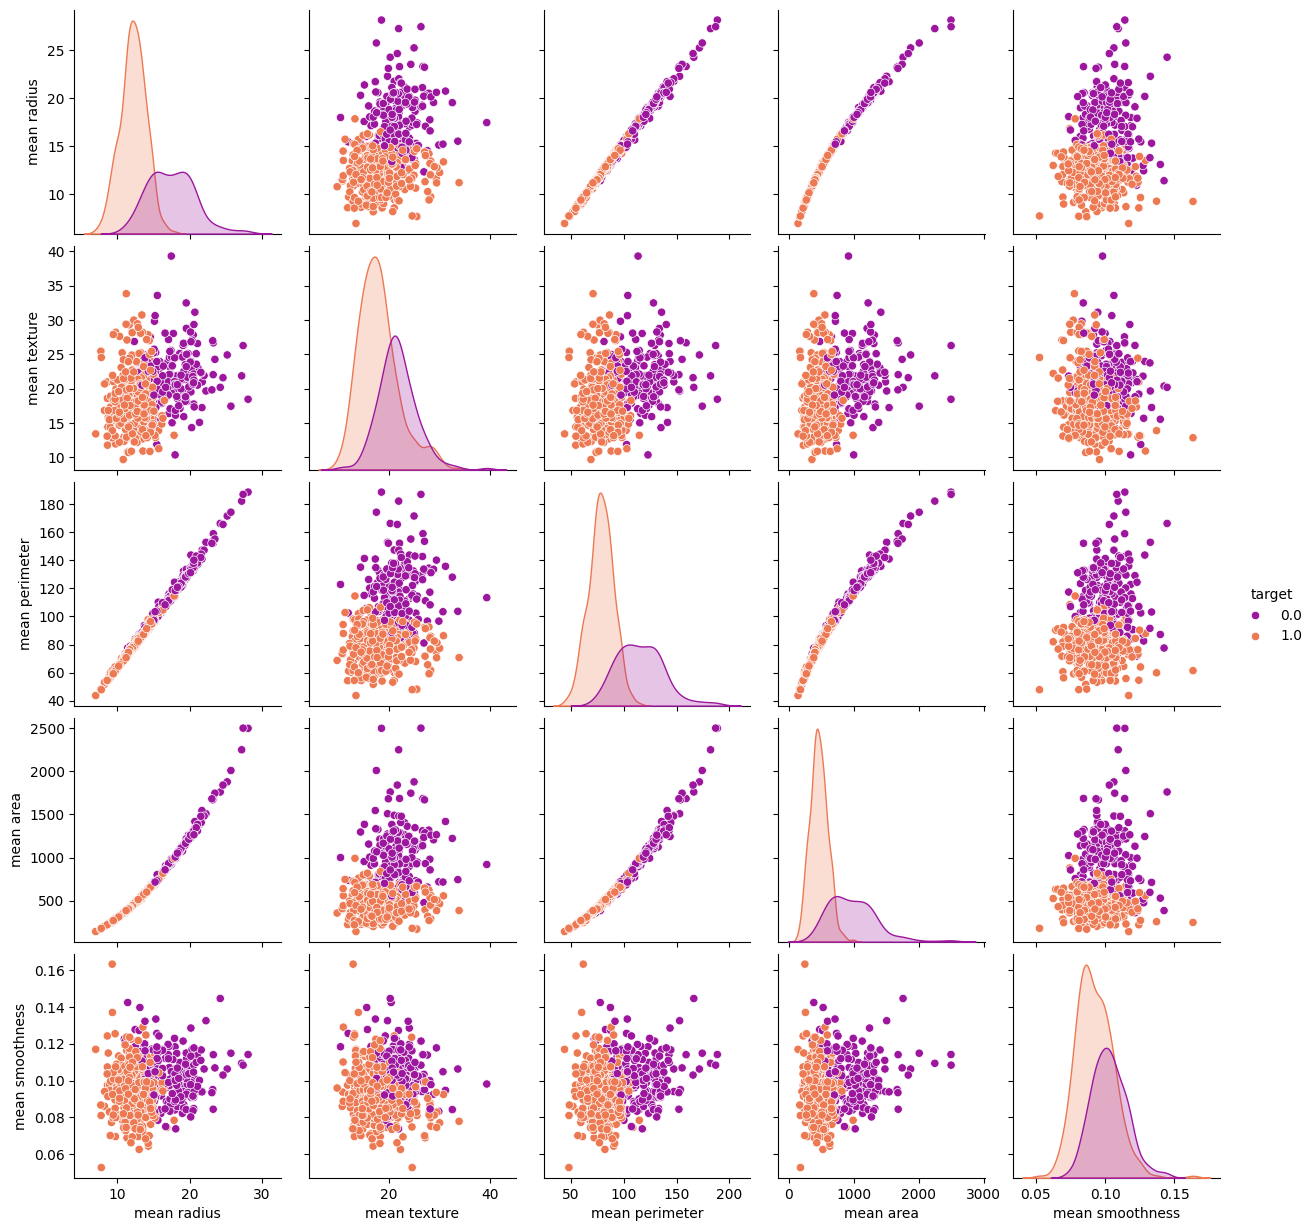

In [2]:
# Check the shape of the dataset
Breast_cancer_df.shape

# Plotting the pairplot for some features
sns.pairplot(Breast_cancer_df, hue='target', palette='plasma', vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness'])
plt.show()

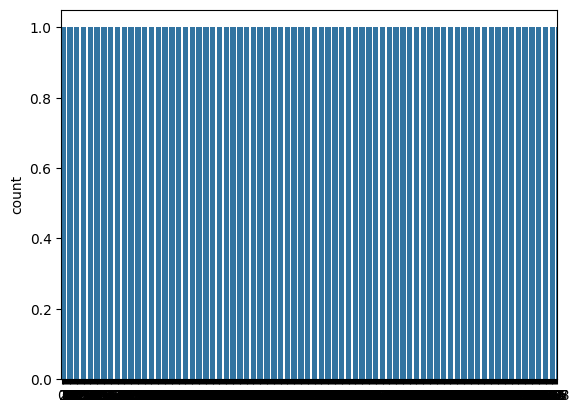

In [3]:
# Plotting the value counts of target
sns.countplot(Breast_cancer_df['target'], label='Count')
plt.show()

In [15]:
# Dropping the target column to create the feature dataset
Train_data = Breast_cancer_df.drop(['target'], axis=1)
Train_data.head()

# Extracting the target column
Target_data = Breast_cancer_df['target']
Target_data.head()

,target
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(Train_data, Target_data, test_size=0.2, random_state=20)

# Check the shape of training and testing data
print("Number of training samples input is:", X_train.shape)
print("Number of testing samples input is:", X_test.shape)
print("Number of training samples output is:", Y_train.shape)
print("Number of testing samples output is:", Y_test.shape)


Number of training samples input is: (455, 30)
Number of testing samples input is: (114, 30)
Number of training samples output is: (455,)
Number of testing samples output is: (114,)


In [11]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train_scaled, Y_train)


SVC()

In [12]:
# Make predictions on the test data
Y_pred = svc_model.predict(X_test_scaled)

from sklearn.metrics import classification_report, confusion_matrix

# Display confusion matrix
cm = pd.DataFrame(confusion_matrix(Y_test, Y_pred), index=['is_cancer', 'is_healthy'], columns=['predicted_cancer', 'predicted_healthy'])
cm

,predicted_cancer,predicted_healthy
is_cancer,47,1
is_healthy,0,66


In [13]:
# Display classification report
print(classification_report(Y_test, Y_pred))


              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        48
         1.0       0.99      1.00      0.99        66

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

